In [1]:
## Automl with ersilia embeddings
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report
import flaml
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

In [8]:
# Load the model
model_path = '../../checkpoints/AutoML_ersilia.joblib'
AutoML_model = joblib.load(model_path)

In [9]:
# Load the TDC dataset
tdc_data_path = '../data/tdc_test_set.csv'
tdc_data = pd.read_csv(tdc_data_path)

In [11]:
##Convert SMILES to Ersilia Embeddings:

from eosce.models import ErsiliaCompoundEmbeddings

# Assuming 'SMILES' is the column containing chemical compounds in your TDC dataset
tdc_compounds = tdc_data['smiles'].tolist()

# Initialize the ErsiliaCompoundEmbeddings model
model = ErsiliaCompoundEmbeddings()

# Create a new column for embeddings
tdc_data['embeddings'] = tdc_data['smiles'].apply(lambda x: model.transform([x])[0])


# Assuming preprocess_data is your data preprocessing function
X_tdc = tdc_data['embeddings']

In [13]:
print(X_tdc)

0      [-0.022244511, -0.049714245, 0.00392899, 0.120...
1      [0.038444757, -0.12525988, -0.011432024, 0.039...
2      [-0.09020368, 0.11691403, 0.11882201, 0.053132...
3      [-0.022299724, -0.039833173, -0.017842378, 0.0...
4      [0.054042023, -0.053978935, -0.016687842, 0.10...
                             ...                        
279    [0.09199667, -0.071337305, 0.011969814, 0.0772...
280    [0.05699184, -0.015053667, -0.047389545, -0.05...
281    [0.10620239, -0.007281141, -0.25737908, -0.014...
282    [0.03251487, 0.02081342, 0.0010510255, -0.0059...
283    [0.09114363, -0.00090367626, -0.22689229, -0.0...
Name: embeddings, Length: 284, dtype: object


In [14]:
X_tdc = np.array(tdc_data['embeddings'].tolist())

AUC on TDC dataset: 0.7587728405315615


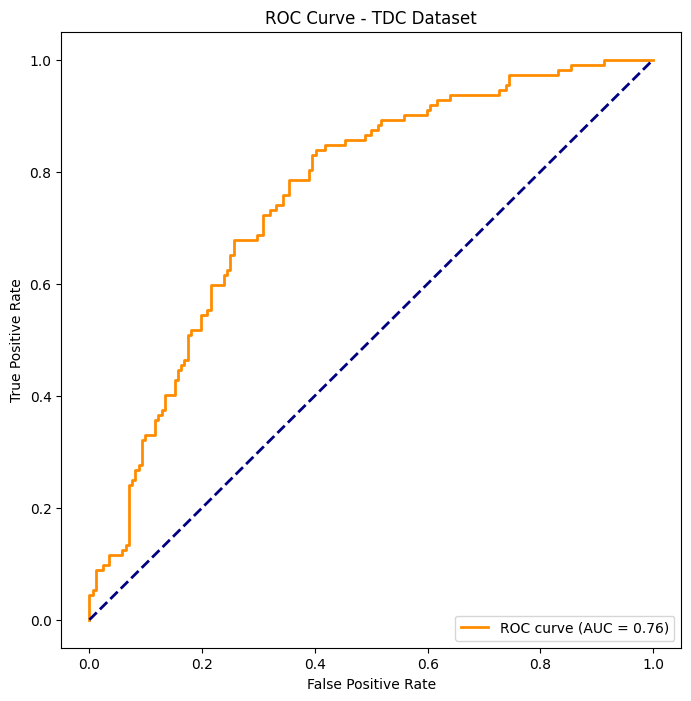

In [16]:
# Predict probabilities for the positive class
tdc_predictions_proba = AutoML_model.predict_proba(X_tdc)[:, 1]

# Assuming you have the true labels in 'Target' column
# Calculate ROC curve and AUC
fpr_tdc, tpr_tdc, thresholds_tdc = roc_curve(tdc_data['outcome'], tdc_predictions_proba)
auc_tdc = auc(fpr_tdc, tpr_tdc)

print(f"AUC on TDC dataset: {auc_tdc}")

# Optionally, visualize the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr_tdc, tpr_tdc, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_tdc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TDC Dataset')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import classification_report

# Assuming you have true labels in 'Y' column
true_labels = tdc_data['outcome']

# Set a threshold for binary classification (if needed)
threshold = 0.5  # Adjust this threshold based on your specific requirements

# Assuming you have predictions in 'tdc_predictions_proba'
tdc_predictions = (tdc_predictions_proba > threshold).astype(int)

# Generate classification report
classification_rep = classification_report(true_labels, tdc_predictions)

# Print the classification report
print("Classification Report on TDC dataset:")
print(classification_rep)

Classification Report on TDC dataset:
              precision    recall  f1-score   support

         0.0       0.93      0.25      0.39       172
         1.0       0.46      0.97      0.62       112

    accuracy                           0.54       284
   macro avg       0.70      0.61      0.51       284
weighted avg       0.75      0.54      0.48       284



In [19]:
from sklearn.metrics import confusion_matrix


true_labels = tdc_data['outcome']

# Set a threshold for binary classification (if needed)
threshold = 0.5  # Adjust this threshold based on your specific requirements

# Assuming you have predictions in 'tdc_predictions_proba'
tdc_predictions = (tdc_predictions_proba > threshold).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, tdc_predictions)

# Print the confusion matrix
print("Confusion Matrix on TDC dataset:")
print(conf_matrix)


Confusion Matrix on TDC dataset:
[[ 43 129]
 [  3 109]]


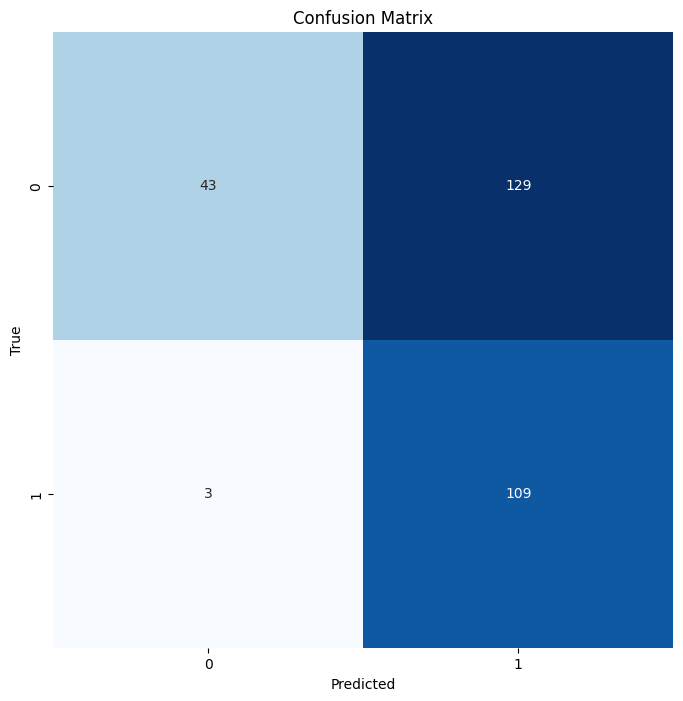

In [20]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'outcome' is the name of the Series containing predicted outcomes
tdc_predictions = tdc_predictions

# Calculate confusion matrix
cm = confusion_matrix(true_labels, tdc_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [21]:
 ##Autogluon with padel
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report
import flaml
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

In [22]:
##Autogluon with padel descriptors

In [23]:
import pandas as pd
from padelpy import from_smiles

In [24]:
# Load the model
model_path = 'AutogluonModels/ag-20240123_030131'
from autogluon.tabular import TabularDataset, TabularPredictor

In [43]:
# Read the tdc dataset CCSV 
data = pd.read_csv('../data/tdc_test_set.csv')

data_subset = data.head(100)

# Convert SMILES column to a list
smiles_list = data_subset['smiles'].tolist()

# Calculate descriptors for each SMILES string
descriptors_list = from_smiles(smiles_list)

# Convert descriptors list to a DataFrame
descriptors_df = pd.DataFrame(descriptors_list)

# Add the outcome column to the descriptors DataFrame
descriptors_df['outcome'] = data_subset['outcome']

output_csv_file = '../data/tdc_padel_descriptors_concatenated.csv'
descriptors_df.to_csv(output_csv_file, index=False)

In [44]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [45]:
# Load the saved model
predictor = TabularPredictor.load("AutogluonModels/ag-20240123_030131")

# Load your new dataset for validation
validation_data = TabularDataset('../data/tdc_padel_descriptors_concatenated.csv')
# Drop rows with missing labels
validation_data = validation_data.dropna(subset=['outcome'])

In [46]:
# Predict on the validation data
predictions = predictor.predict(validation_data)

# Evaluate the performance on the validation data
performance = predictor.evaluate(validation_data)

In [40]:
print(performance)

{'accuracy': 0.57, 'balanced_accuracy': 0.6869839728023313, 'mcc': 0.370299311442842, 'roc_auc': 0.8338999514327343, 'f1': 0.5656565656565657, 'precision': 0.4, 'recall': 0.9655172413793104}


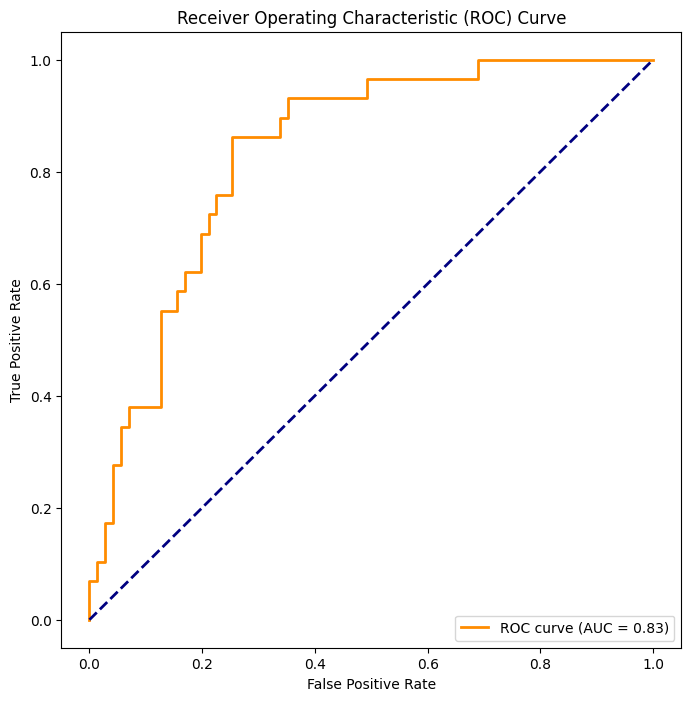

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'outcome' is the target column in your validation dataset
y_true = validation_data['outcome']
y_scores = predictor.predict_proba(validation_data.drop(columns=['outcome'])).iloc[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_true, y_scores)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
